I compare the performance of 3 different classification algorithms on the problem of classifying stars, which is a multi-classification problem. These algorithms are:
- Logistic Regression
- K-NN
- SVM

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

In [ ]:
# import data
stars = pd.read_csv ('https://github.com/YBIFoundation/Dataset/raw/main/Stars.csv')

In [ ]:
stars.head()

,Temperature (K),Luminosity (L/Lo),Radius (R/Ro),Absolute magnitude (Mv),Star type,Star category,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Brown Dwarf,Red,M
1,3042,0.000500,0.1542,16.60,0,Brown Dwarf,Red,M
2,2600,0.000300,0.1020,18.70,0,Brown Dwarf,Red,M
3,2800,0.000200,0.1600,16.65,0,Brown Dwarf,Red,M
4,1939,0.000138,0.1030,20.06,0,Brown Dwarf,Red,M


In [ ]:
stars.isnull().sum()

Temperature (K)            0
Luminosity (L/Lo)          0
Radius (R/Ro)              0
Absolute magnitude (Mv)    0
Star type                  0
Star category              0
Star color                 0
Spectral Class             0
dtype: int64

In [ ]:
stars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Temperature (K)          240 non-null    int64  
 1   Luminosity (L/Lo)        240 non-null    float64
 2   Radius (R/Ro)            240 non-null    float64
 3   Absolute magnitude (Mv)  240 non-null    float64
 4   Star type                240 non-null    int64  
 5   Star category            240 non-null    object 
 6   Star color               240 non-null    object 
 7   Spectral Class           240 non-null    object 
dtypes: float64(3), int64(2), object(3)
memory usage: 15.1+ KB


In [ ]:
stars.describe()

,Temperature (K),Luminosity (L/Lo),Radius (R/Ro),Absolute magnitude (Mv),Star type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


<Axes: xlabel='Star category', ylabel='count'>

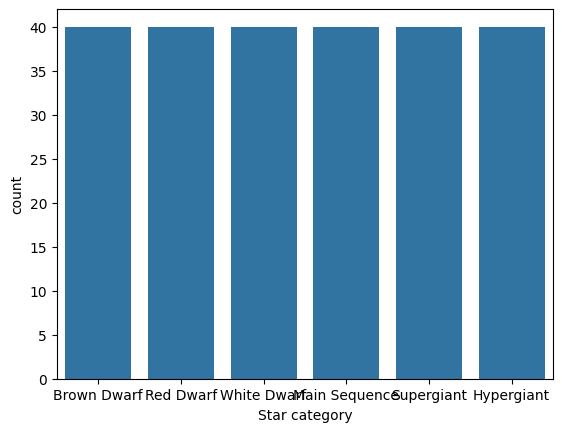

In [ ]:
sbn.countplot(x = "Star category", data = stars)

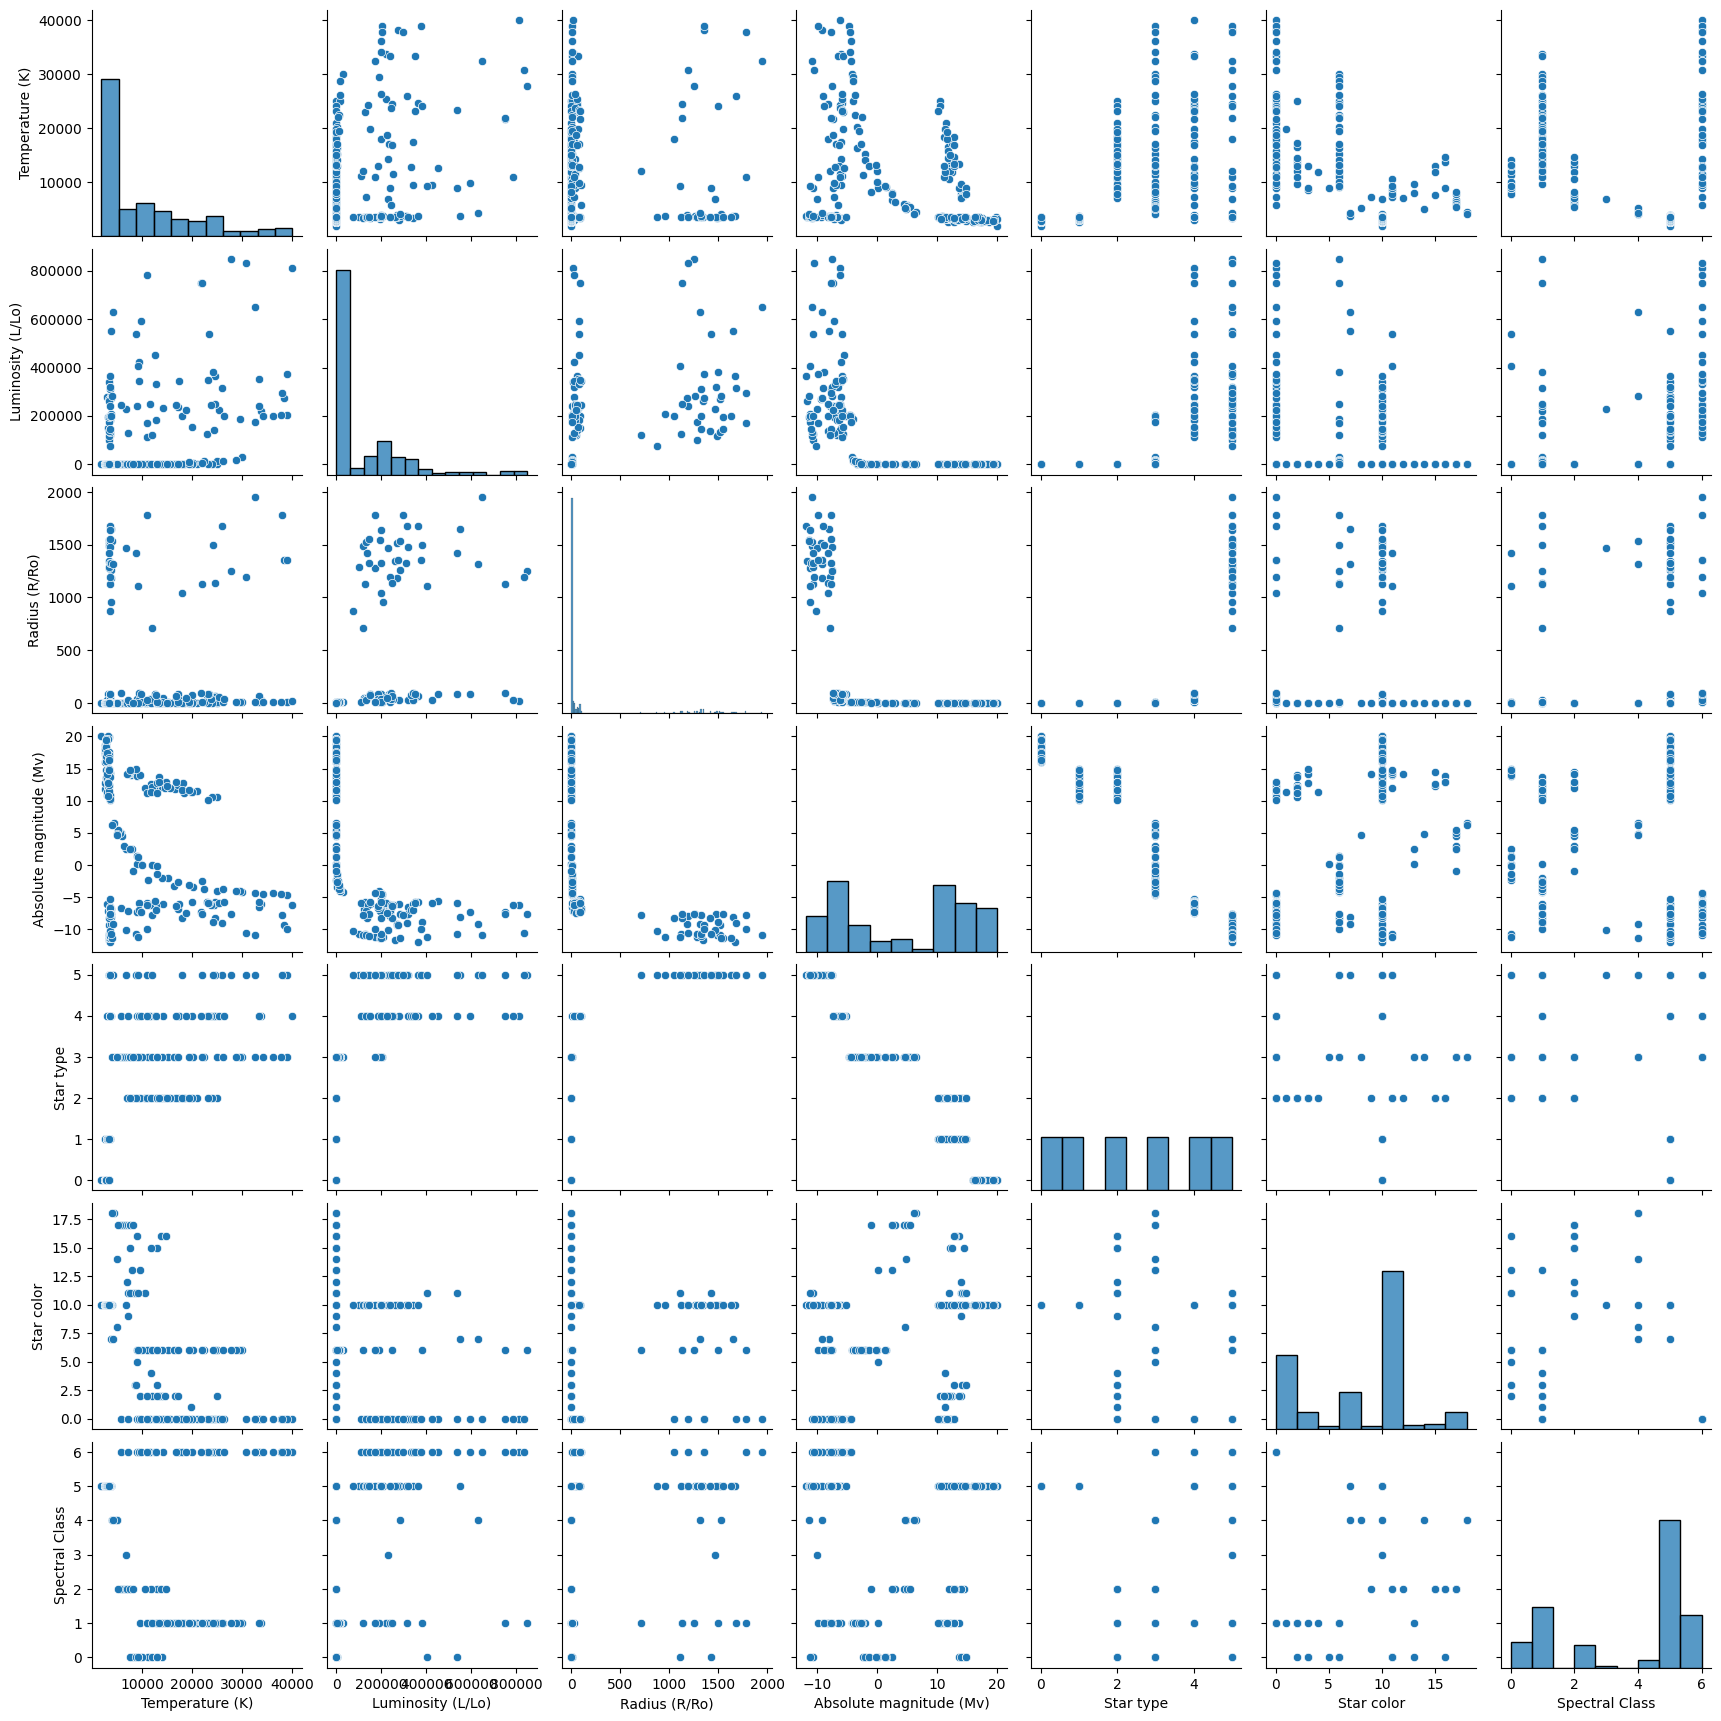

In [ ]:
sbn.pairplot(stars)

# Convert categorical data to numeric data
- Star category --> Target label (it is not necessary to encode)
- Star color
- Spectral Class

In [ ]:
stars['Star color'].value_counts()

Star color
10    112
0      55
6      26
2      10
17      8
11      7
3       3
15      3
16      3
13      2
7       2
18      2
9       1
12      1
1       1
14      1
8       1
4       1
5       1
Name: count, dtype: int64

In [ ]:
stars['Spectral Class'].value_counts()

Spectral Class
5    111
1     46
6     40
0     19
2     17
4      6
3      1
Name: count, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# object of label encoder
le = LabelEncoder()

In [ ]:
# Encoding "Star color"
stars['Star color'] = le.fit_transform(stars['Star color'])

# Encoding "Spectral Class"
stars['Spectral Class'] = le.fit_transform(stars['Spectral Class'])

# Check result
print(stars.head())


   Temperature (K)  Luminosity (L/Lo)  Radius (R/Ro)  Absolute magnitude (Mv)  \
0             3068           0.002400         0.1700                    16.12   
1             3042           0.000500         0.1542                    16.60   
2             2600           0.000300         0.1020                    18.70   
3             2800           0.000200         0.1600                    16.65   
4             1939           0.000138         0.1030                    20.06   

   Star type Star category  Star color  Spectral Class  
0          0   Brown Dwarf          10               5  
1          0   Brown Dwarf          10               5  
2          0   Brown Dwarf          10               5  
3          0   Brown Dwarf          10               5  
4          0   Brown Dwarf          10               5  


In [ ]:
stars.to_csv('encoded_stars.csv', index=False)
stars.head()

,Temperature (K),Luminosity (L/Lo),Radius (R/Ro),Absolute magnitude (Mv),Star type,Star category,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Brown Dwarf,10,5
1,3042,0.000500,0.1542,16.60,0,Brown Dwarf,10,5
2,2600,0.000300,0.1020,18.70,0,Brown Dwarf,10,5
3,2800,0.000200,0.1600,16.65,0,Brown Dwarf,10,5
4,1939,0.000138,0.1030,20.06,0,Brown Dwarf,10,5


# Split data

In [ ]:
from sklearn.model_selection import train_test_split

X = stars.drop(['Star category'], axis=1)
y = stars['Star category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
# Veri setinin ilk birkaç satırını görüntüleme
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (160, 7)
X_test shape: (80, 7)
y_train shape: (160,)
y_test shape: (80,)


# Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

# object of standard scaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# 1) Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

# object of logistic regression
model_lr = LogisticRegression(max_iter=1000)

# fit the model
model_lr.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

# Prediction

In [ ]:
prediction_lr = model_lr.predict(X_test)

# Evaluate model performance

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Accuracy score
accuracy = accuracy_score(y_test, prediction_lr)
print("Accuracy:", accuracy)

# Confusion matrix
cm = confusion_matrix(y_test, prediction_lr)
print("Confusion Matrix:\n", cm)

# Calssification report
cr = classification_report(y_test, prediction_lr)
print("Classification Report:\n", cr)


Accuracy: 0.9625
Confusion Matrix:
 [[16  0  0  0  0  0]
 [ 0 16  0  0  0  0]
 [ 0  0  9  0  1  1]
 [ 1  0  0 12  0  0]
 [ 0  0  0  0 12  0]
 [ 0  0  0  0  0 12]]
Classification Report:
                precision    recall  f1-score   support

  Brown Dwarf       0.94      1.00      0.97        16
   Hypergiant       1.00      1.00      1.00        16
Main Sequence       1.00      0.82      0.90        11
    Red Dwarf       1.00      0.92      0.96        13
   Supergiant       0.92      1.00      0.96        12
  White Dwarf       0.92      1.00      0.96        12

     accuracy                           0.96        80
    macro avg       0.96      0.96      0.96        80
 weighted avg       0.97      0.96      0.96        80



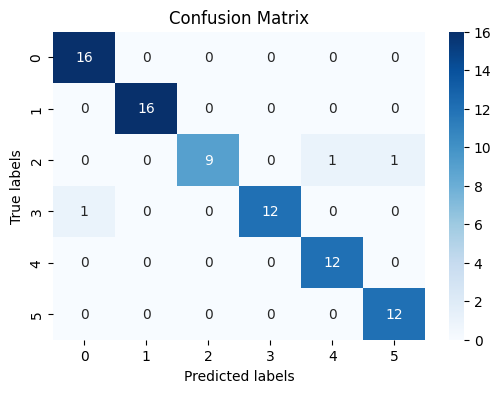

In [ ]:
# Confusion Matrix in the graph
plt.figure(figsize=(6, 4))
sbn.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# 2) K-NN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Build Model
model_knn = KNeighborsClassifier(n_neighbors=2, metric='minkowski')

# Fit Model
model_knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=2)

# Prediction

In [ ]:
prediction_knn = model_knn.predict(X_test)

# Evaluate model performance

In [ ]:
accuracy_knn = accuracy_score(y_test, prediction_knn)
print("K-NN Model Accuracy:", accuracy_knn)

K-NN Model Accuracy: 0.75


# 3) SVM

In [ ]:
from sklearn.svm import SVC

# Build model
model_svm = SVC(kernel='linear', C=1.0, gamma='scale')

# Fit model
model_svm.fit(X_train, y_train)


SVC(kernel='linear')

# Prediction

In [ ]:
prediction_svm = model_svm.predict(X_test)

# Evaluate Model Perfromance

In [ ]:
accuracy_svm = accuracy_score(y_test, prediction_svm)
print("SVM Model Accuracy:", accuracy_svm)

SVM Model Accuracy: 0.9875


==> With the kernel function "rbf" the accuracy was 0.28, when I changed the function to "linear" the accuracy increased to 0.98

# Result:
The best performing machine learning algorithms for this dataset, in order:
- SVM (0.98)
- Logistic Regression (0.96)
- K-NN (0.75)




⭐️_😛
